# Lab 2 SGD
1. Learn to define and train a two-layer neural network model without activations using PyTorch.
2. Gain insights into the presence of multiple local minima in the loss landscape and how it affects the optimization process, and understand the concept of non-convexity in neural networks.
3. Implement manual updates for stochastic gradient descent (SGD) with momentum, without using an torch.optimizer, and compare the training loss, test loss, and accuracy with SGD using an optimizer.
4. Explore the generation of adversarial examples using algorithms like FGSM or PGD, and evaluate the model's robustness by measuring its accuracy on these examples compared to clean examples.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
# Define the data preprocessing transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image data
])

# Load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

trainset.data.shape



100%|██████████| 9912422/9912422 [00:00<00:00, 278788380.90it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 85729436.54it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 164004159.37it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4412909.14it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([60000, 28, 28])

# Task1

* Complet the model below with two fully connected layers without activations.

* Provide a proof or explanation for the non-convexity of the two-layer neural network without activations. How can you demonstrate the presence of multiple local minima in the loss landscape?

* Run SGD to optimize the classification of the NN using opt.SGD with momentum, show the training loss, test loss, and accuracy

In [ ]:
# Define a two-layer neural network model with no activations
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        # TODO: Define the layers of your two-layer neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
        pass

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x
        pass

# Initialize models and optimizers
# TODO: Initialize two instances of your TwoLayerNet model

model_sgd = TwoLayerNet()
# Define loss function
# TODO: Define an appropriate loss function for multi-class classification

criterion = nn.CrossEntropyLoss()




## On the non-convexity of two layer neural network without activations

Firstly, the neural network without activation functions is essentially a composition of linear transformations, represented by the weight matrices and the output of the two layer neural network with input sample $(x_i, y_i)$ can be represented by:
$$ \hat{y_i} =  W_{output} \cdot (W_{hidden} \cdot x_i )$$

However, the loss function for a typical classification problem, like multi-class classification, is often non-convex. For example, let's consider the cross-entropy loss:

$$ L(\hat{y_i}, y_i) = -\sum_{c=1}^{10} y_{ic} \log(p_{ic})$$
where $p_{ic} = softmax(\hat{y_i})_c$. The non-convexity occurs because the logarithm function has a curvature that makes the loss landscape non-convex.


Epoch [1/10] - Training Loss: 0.4135851832007421
Epoch [2/10] - Training Loss: 0.3279646019945775
Epoch [3/10] - Training Loss: 0.3155336113833288
Epoch [4/10] - Training Loss: 0.30915393711311984
Epoch [5/10] - Training Loss: 0.30061466577274204
Epoch [6/10] - Training Loss: 0.2978235757999074
Epoch [7/10] - Training Loss: 0.2948898275746211
Epoch [8/10] - Training Loss: 0.2942468253855925
Epoch [9/10] - Training Loss: 0.291309075251317
Epoch [10/10] - Training Loss: 0.29029982639893664
Test Loss: 0.2899333244296396, Test Accuracy: 91.75%


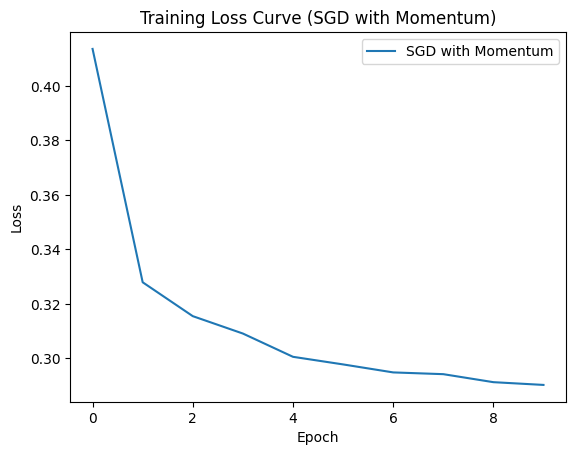

In [ ]:
# Training parameters
num_epochs = 10
learning_rate = 0.01
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=learning_rate, momentum=0.9)  # Initialize SGD optimizer

# Lists to store loss values for plotting
losses_sgd = []

# Training loop with optimizer (SGD)
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_sgd.zero_grad()

        # Forward pass
        outputs = model_sgd(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update model weights
        optimizer_sgd.step()

        running_loss += loss.item()

    losses_sgd.append(running_loss / len(trainloader))
    print(f"Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {running_loss / len(trainloader)}")

# Test the trained model
model_sgd.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model_sgd(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_sgd = 100 * correct / total
print(f"Test Loss: {test_loss / len(testloader)}, Test Accuracy: {accuracy_sgd}%")

# Plot the loss curve
plt.plot(losses_sgd, label='SGD with Momentum')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curve (SGD with Momentum)')
plt.show()


# Task 2

* Implements the SGD with momentum without the use of optimizer used in last task, show the training loss, test loss, and accuracy

* What is the bias of the momentum-baed gradient in SGD? Propose a way to improve it as taught in class

* How SGD with replacement is different than SGD without replacement.

* Save the model to be loaded later for testing

Epoch [1/10] - Training Loss: 0.6975620965332364, Test Loss: 0.3807024797483994, Test Accuracy: 89.42%
Epoch [2/10] - Training Loss: 0.36715791061488806, Test Loss: 0.32767144290457484, Test Accuracy: 90.63%
Epoch [3/10] - Training Loss: 0.3324126613292613, Test Loss: 0.31587528690078837, Test Accuracy: 91.15%
Epoch [4/10] - Training Loss: 0.3162596139635867, Test Loss: 0.29865506786117507, Test Accuracy: 91.34%
Epoch [5/10] - Training Loss: 0.3067978203598497, Test Loss: 0.2933795870916479, Test Accuracy: 91.8%
Epoch [6/10] - Training Loss: 0.3003704251010598, Test Loss: 0.28637778706801165, Test Accuracy: 91.66%
Epoch [7/10] - Training Loss: 0.29525151836878455, Test Loss: 0.28667407972251724, Test Accuracy: 91.98%
Epoch [8/10] - Training Loss: 0.29036046801679044, Test Loss: 0.28330438773912986, Test Accuracy: 91.97%
Epoch [9/10] - Training Loss: 0.287385012549378, Test Loss: 0.28209138586286714, Test Accuracy: 91.8%
Epoch [10/10] - Training Loss: 0.2844441187566023, Test Loss: 0.28

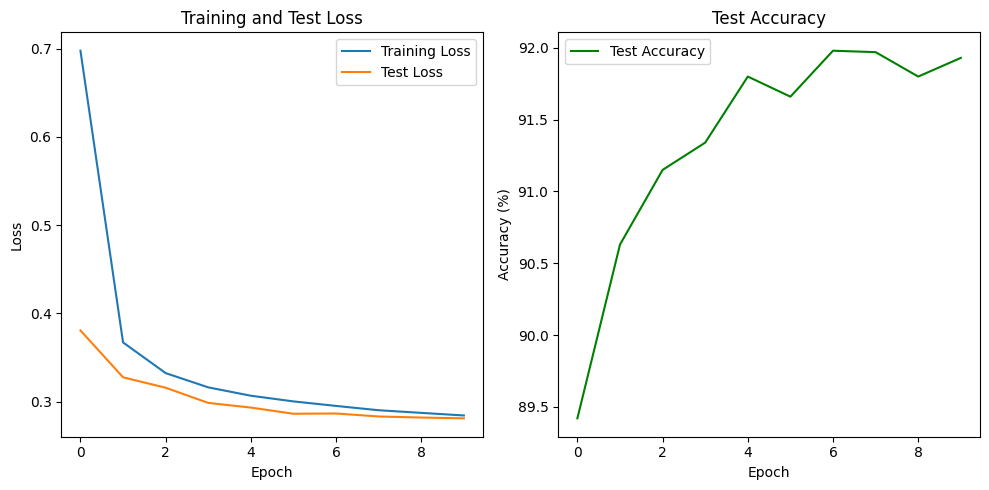

Finished Training


In [ ]:
# Training loop without optimizer (Incomplete)
# TODO: Implement manual SGD updates for training without an optimizer

# Define a custom SGD optimizer with momentum
def custom_sgd_momentum_optimizer(model, learning_rate, momentum):
    for param in model.parameters():
        if hasattr(param, 'momentum_buffer'):
            param.momentum_buffer = momentum * param.momentum_buffer + (1 - momentum) * param.grad.data
        else:
            param.momentum_buffer = (1 - momentum) * param.grad.data
        param.data -= learning_rate * param.momentum_buffer



# Initialize the model
model = TwoLayerNet()

# Training parameters
num_epochs = 10
learning_rate = 0.01
momentum = 0.9  # Momentum coefficient

# Lists to store loss values for plotting
losses_train = []
losses_test = []
accuracies_test = []

# Define the loss function for multi-class classification
criterion = nn.CrossEntropyLoss()

# Training loop with custom SGD optimizer with momentum
for epoch in range(num_epochs):
    running_loss_train = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # inputs = inputs.reshape(-1, 784)
        # Clear the gradients for manual update
        model.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss_train = criterion(outputs, labels)

        # Backward pass and optimization using custom SGD with momentum
        loss_train.backward()
        custom_sgd_momentum_optimizer(model, learning_rate, momentum)

        running_loss_train += loss_train.item()

    losses_train.append(running_loss_train / len(trainloader))

    # Evaluate the model on the test set
    correct = 0
    total = 0
    running_loss_test = 0.0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy_test = 100 * correct / total
    losses_test.append(running_loss_test / len(testloader))
    accuracies_test.append(accuracy_test)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {running_loss_train / len(trainloader)}, Test Loss: {running_loss_test / len(testloader)}, Test Accuracy: {accuracy_test}%")

# Save the trained model
torch.save(model.state_dict(), 'mnist_model.pth')

# Plot the loss curve and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_train, label='Training Loss')
plt.plot(losses_test, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies_test, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Test Accuracy')

plt.tight_layout()
plt.show()

print("Finished Training")






## bias of the momentum-baed gradient in SGD

The bias in the momentum-based gradient in SGD arises from the initialization of the momentum term. In the initial iterations, the momentum term is close to zero, and it gradually accumulates values based on past gradients. This can introduce a bias towards the accumulated gradients, particularly when the gradients are inconsistent in direction.

To improve this bias, one common technique is to use bias correction. Instead of initializing the momentum term to zero, you can initialize it with a correction factor related to the momentum coefficient. This correction factor ensures that the initial values are unbiased and gradually adapt to the momentum. The corrected momentum update formula might look like:

$$m_t = \beta m_{t-1} + (1-\beta)g_t \\
\hat{m_t} = m_t / (1-\beta^t)$$

## How SGD with replacement is different than SGD without replacement

SGD with Replacement: In SGD with replacement, each mini-batch is randomly sampled from the entire training dataset with replacement. This means that the same example can be included multiple times in the same mini-batch. It's a common approach in stochastic gradient descent.

SGD without Replacement: In contrast, SGD without replacement ensures that each example from the training dataset is included only once in a mini-batch. It guarantees that each example is used exactly once in each epoch. This approach is sometimes used when you want to ensure that each training example contributes equally to the training process.

# Task 3

* Adversarial Examples Generation: Implement an algorithm such as Fast Gradient Sign Method (FGSM), or Projected Gradient Descent (PGD) to generate adversarial examples. These algorithms perturb the input data in a way that maximizes the model's prediction error while keeping the perturbations small.



In [ ]:

def fgsm_attack(model, loss_fn, images, labels, epsilon):
    # Ensure that the input images require gradients
    images.requires_grad = True

    # Forward pass to compute the model's predictions
    outputs = model(images)

    # Calculate the loss
    loss = loss_fn(outputs, labels)

    # Backpropagate the gradients
    loss.backward()

    # Get the sign of the gradients (direction of perturbation)
    gradient_sign = torch.sign(images.grad)

    # Generate adversarial examples by adding perturbations to the original images
    perturbed_images = images + epsilon * gradient_sign

    # Clip the perturbed images to ensure they stay within valid pixel value range (0, 1)
    perturbed_images = torch.clamp(perturbed_images, 0, 1)

    # Return the perturbed images
    return perturbed_images

# Task 4

* Use the generated adversarial examples to evaluate the model's robustness. Feed the adversarial examples made from test loader into the model and measure the model's accuracy on these examples (how many of thesee are still correctly classified). Compare the model's performance on adversarial examples with its performance on clean examples to assess its vulnerability to adversarial attacks.

In [ ]:
# Set the model to evaluation mode
model.eval()

# Initialize variables for accuracy calculation
total_correct_clean = 0
total_correct_adversarial = 0
total_samples = 0

# Iterate over the test loader
for images, labels in testloader:
    # Forward pass with clean examples
    outputs_clean = model(images)

    # Calculate predicted labels for clean examples
    _, predicted_clean = torch.max(outputs_clean.data, 1)

    # Generate adversarial examples using FGSM
    epsilon = 0.03  # Adjust the epsilon value as needed
    adversarial_images = fgsm_attack(model, criterion, images, labels, epsilon)

    # Forward pass with adversarial examples
    outputs_adversarial = model(adversarial_images)

    # Calculate predicted labels for adversarial examples
    _, predicted_adversarial = torch.max(outputs_adversarial.data, 1)

    # Update accuracy variables for clean and adversarial examples
    total_samples += labels.size(0)
    total_correct_clean += (predicted_clean == labels).sum().item()
    total_correct_adversarial += (predicted_adversarial == labels).sum().item()

# Calculate accuracy on clean and adversarial examples
accuracy_clean = total_correct_clean / total_samples
accuracy_adversarial = total_correct_adversarial / total_samples

# Print the accuracies
print("Accuracy on clean test set: {:.2f}%".format(accuracy_clean * 100))
print("Accuracy on adversarial test set: {:.2f}%".format(accuracy_adversarial * 100))



Accuracy on clean test set: 92.12%
Accuracy on adversarial test set: 83.27%
